# Global Well-Being Prediction Using Development Indicators
## Objective
The main goal of this project is to predict the global well-being of countries based on a combination of socioeconomic, governance, and subjective well-being indicators. The project leverages data from the World Happiness Report from 2005 to 2023, integrating various factors such as economic conditions, social support, governance, health, and individual perceptions to predict overall happiness and life satisfaction across nations.

In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Socioeconomic_Governance_and_Happiness_Metrics.csv')

In [408]:
df.head()

,Country,Region,Year,Log GDP per capita,Log GNI per capita,GNI Classification,Total Population,Population Growth Rate (%),Population Growth,Voice and Accountability,Political Stability,Government Effectiveness,Regulatory Quality,Rule of Law,Internet Penetration,Social Support,Healthy Life Expectancy,Child Mortality Rate,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Positive Affect,Negative Affect,Life Ladder Score
0,Afghanistan,South Asia,2008,7.350,5.913503,Low Income,26427199,2.0,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.451,50.5,High,0.718,0.164,0.882,0.414,0.258,3.724
1,Afghanistan,South Asia,2009,7.509,6.131226,Low Income,27385307,3.6,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.552,50.8,High,0.679,0.187,0.850,0.481,0.237,4.402
2,Afghanistan,South Asia,2010,7.614,6.272877,Low Income,28189672,2.9,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.539,51.1,High,0.600,0.118,0.707,0.517,0.275,4.758
3,Afghanistan,South Asia,2011,7.581,6.309918,Low Income,29249157,3.7,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.521,51.4,High,0.496,0.160,0.731,0.480,0.267,3.832
4,Afghanistan,South Asia,2012,7.661,6.461468,Low Income,30466479,4.1,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.521,51.7,High,0.531,0.234,0.776,0.614,0.268,3.783


In [409]:
df.tail()

,Country,Region,Year,Log GDP per capita,Log GNI per capita,GNI Classification,Total Population,Population Growth Rate (%),Population Growth,Voice and Accountability,Political Stability,Government Effectiveness,Regulatory Quality,Rule of Law,Internet Penetration,Social Support,Healthy Life Expectancy,Child Mortality Rate,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Positive Affect,Negative Affect,Life Ladder Score
2358,Zimbabwe,Sub-Saharan Africa,2019,7.698,7.279319,Lower Middle Income,15354608,2.0,Moderate Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.759,53.100,Moderate,0.632,-0.051,0.831,0.658,0.235,2.694
2359,Zimbabwe,Sub-Saharan Africa,2020,7.596,7.286192,Lower Middle Income,15669666,2.0,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.717,53.575,Moderate,0.643,0.003,0.789,0.661,0.346,3.160
2360,Zimbabwe,Sub-Saharan Africa,2021,7.657,7.339538,Lower Middle Income,15993524,2.0,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.685,54.050,Moderate,0.668,-0.079,0.757,0.610,0.242,3.155
2361,Zimbabwe,Sub-Saharan Africa,2022,7.670,7.450080,Lower Middle Income,16320537,2.0,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.666,54.525,Moderate,0.652,-0.073,0.753,0.641,0.191,3.296
2362,Zimbabwe,Sub-Saharan Africa,2023,7.679,7.461640,Lower Middle Income,16665409,2.1,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,NaN,0.694,55.000,NaN,0.735,-0.069,0.757,0.610,0.179,3.572


In [410]:
df.shape

(2363, 24)

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2363 non-null   object 
 1   Region                        2363 non-null   object 
 2   Year                          2363 non-null   int64  
 3   Log GDP per capita            2335 non-null   float64
 4   Log GNI per capita            2338 non-null   float64
 5   GNI Classification            2338 non-null   object 
 6   Total Population              2363 non-null   int64  
 7   Population Growth Rate (%)    2363 non-null   float64
 8   Population Growth             2363 non-null   object 
 9   Voice and Accountability      2363 non-null   object 
 10  Political Stability           2363 non-null   object 
 11  Government Effectiveness      2363 non-null   object 
 12  Regulatory Quality            2363 non-null   object 
 13  Rul

#### Summary Statistics

In [413]:
df.drop(columns='Year').describe().round(2)

,Log GDP per capita,Log GNI per capita,Total Population,Population Growth Rate (%),Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Positive Affect,Negative Affect,Life Ladder Score
count,2335.00,2338.00,2.363000e+03,2363.00,2350.00,2300.00,2327.00,2282.00,2238.00,2339.00,2347.00,2363.00
mean,9.40,8.66,5.210266e+07,1.26,0.81,63.40,0.75,0.00,0.74,0.65,0.27,5.48
std,1.15,1.47,1.660397e+08,1.47,0.12,6.84,0.14,0.16,0.18,0.11,0.09,1.13
min,5.53,4.87,2.971730e+05,-14.30,0.23,6.72,0.23,-0.34,0.04,0.18,0.08,1.28
25%,8.51,7.45,5.394906e+06,0.40,0.74,59.20,0.66,-0.11,0.69,0.57,0.21,4.65
50%,9.50,8.64,1.223034e+07,1.20,0.83,65.10,0.77,-0.02,0.80,0.66,0.26,5.45
75%,10.39,9.87,3.793227e+07,2.10,0.90,68.55,0.86,0.09,0.87,0.74,0.33,6.32
max,11.68,11.56,1.428628e+09,13.50,0.99,74.60,0.98,0.70,0.98,0.88,0.70,8.02


#### Checking Missing Values

In [415]:
null_count = df.isnull().sum()
print('Total Missing Values : ')
null_count[null_count > 0]

Total Missing Values : 


Log GDP per capita               28
Log GNI per capita               25
GNI Classification               25
Internet Penetration            118
Social Support                   13
Healthy Life Expectancy          63
Child Mortality Rate            138
Freedom to Make Life Choices     36
Generosity                       81
Perceptions of Corruption       125
Positive Affect                  24
Negative Affect                  16
dtype: int64

- From the above `info()` and `isnull()`, we can see there are some missing values in our dataset.

- This can be addressed via imputation techniques and regression models.

#### Distribution of Categorical Features

In [418]:
categorical_cols = df.select_dtypes(include='O').columns.to_list()

In [419]:
data = []

for col in categorical_cols:
    data.append({
        "Columns": col,
        "Column_Uniques": df[col].unique(),
        "No_of_Unique": df[col].nunique(),
    })

pd.DataFrame(data)

,Columns,Column_Uniques,No_of_Unique
0,Country,"[Afghanistan, Albania, Algeria, Angola, Argent...",164
1,Region,"[South Asia, Central and Eastern Europe, Middl...",11
2,GNI Classification,"[Low Income, nan, Lower Middle Income, Upper M...",4
3,Population Growth,"[High Growth, Negative Growth, Moderate Growth...",4
4,Voice and Accountability,"[Oppressed, Limited Freedom, Empowered]",3
5,Political Stability,"[Conflict-Prone, Fragile, Peaceful]",3
6,Government Effectiveness,"[Inefficient, Developing, Efficient]",3
7,Regulatory Quality,"[Restrictive, Inconsistent, Progressive]",3
8,Rule of Law,"[Lawless, Vulnerable, Just]",3
9,Internet Penetration,"[Low Penetration, Medium Penetration, High Pen...",3


- The dataset covers 11 regions across 166 countries for the years 2005 to 2024.

In [421]:
region_shortnames = {
    'South Asia': 'S. Asia',
    'Central and Eastern Europe': 'C. & E. Europe',
    'Middle East and North Africa': 'M. East & N. Africa',
    'Latin America and Caribbean': 'Latin America',
    'Commonwealth of Independent States': 'CIS',
    'ANZ': 'ANZ',
    'Western Europe': 'W. Europe',
    'Sub-Saharan Africa': 'Sub-Saharan Africa',
    'Southeast Asia': 'S. East Asia',
    'North America': 'N. America',
    'East Asia': 'E. Asia'
}
df['Region'] = df['Region'].apply(lambda x : region_shortnames.get(x))

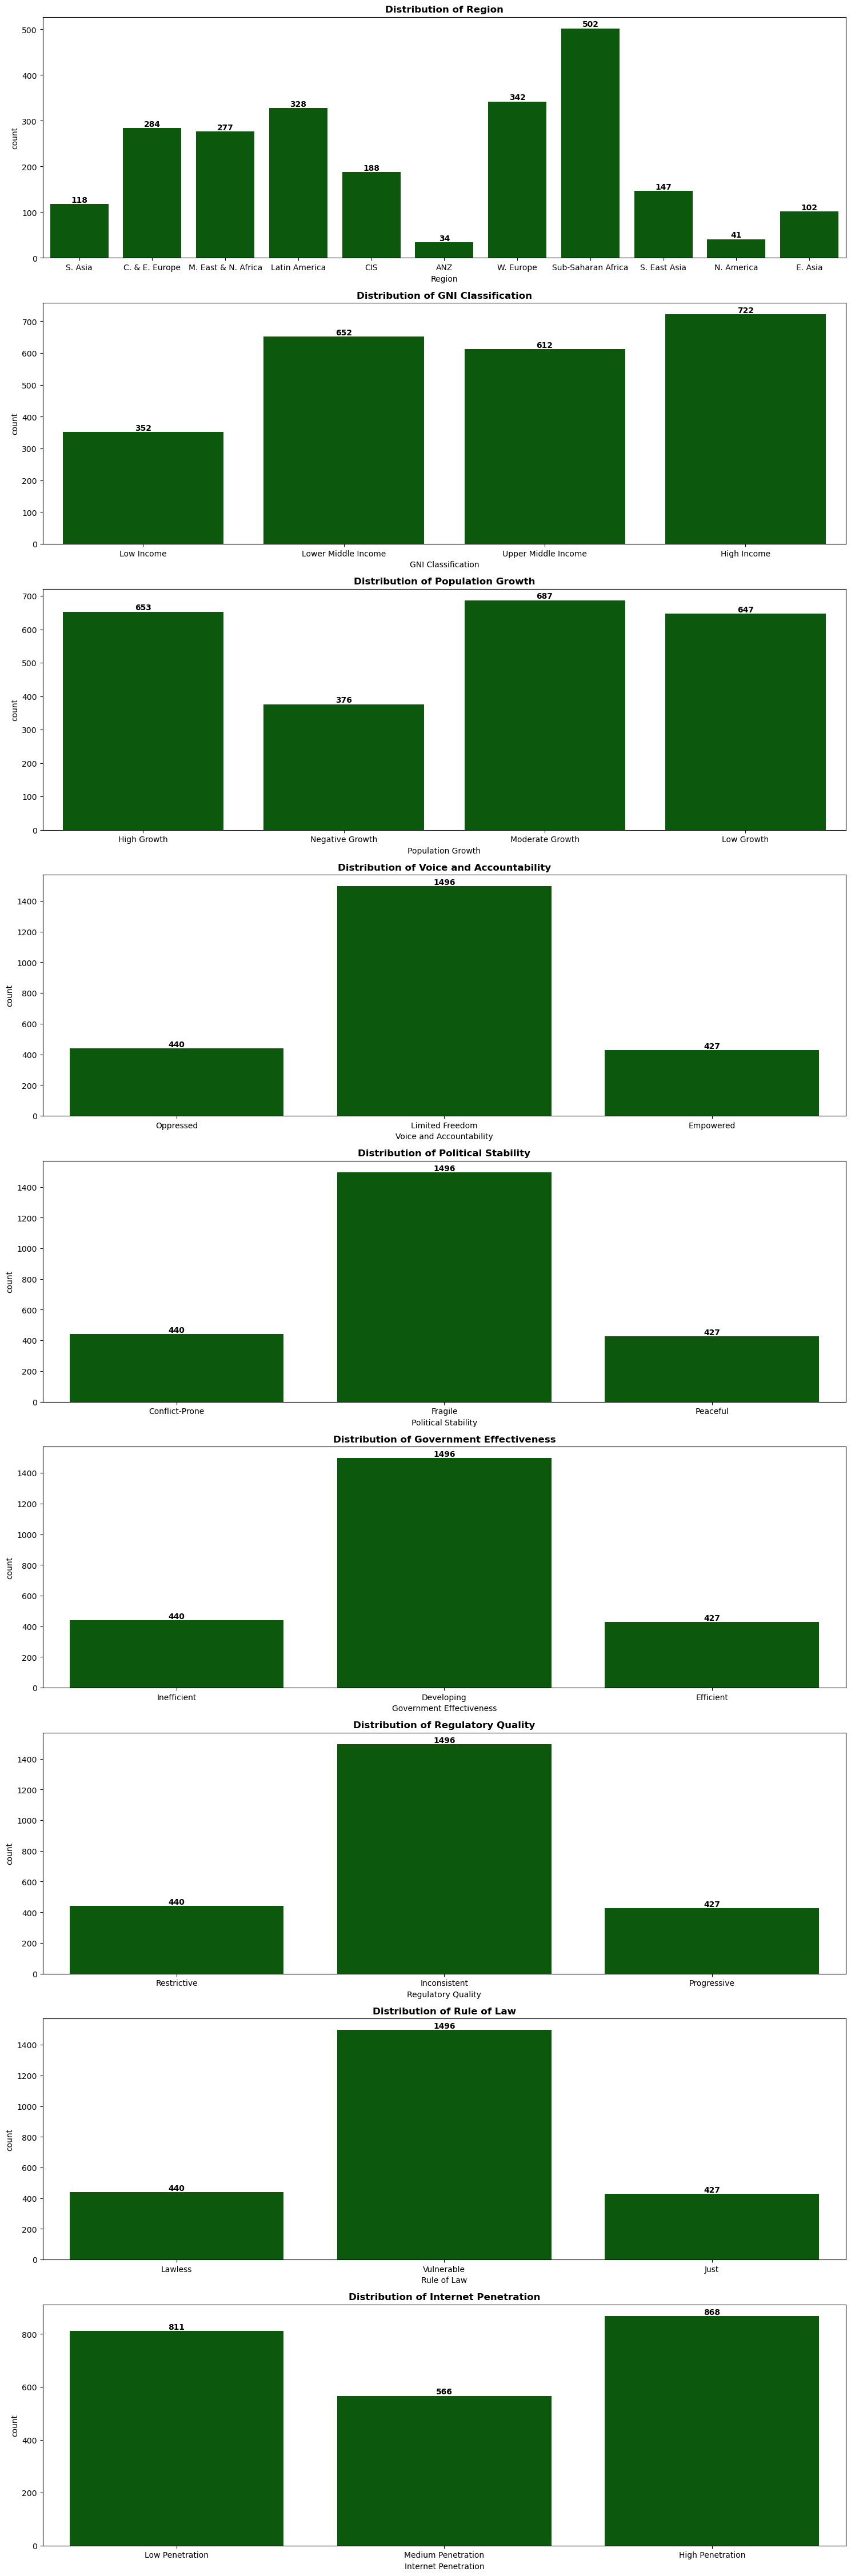

In [422]:
fig, axes = plt.subplots(10, 1, figsize=(15, 50))
axes = axes.flatten()

for col, axis in zip(categorical_cols, axes):
    ax = sns.countplot(data=df, x=col, color='darkgreen', ax=axis)
    ax.bar_label(ax.containers[0], fontweight='bold', fontsize=10)
    axis.set_title(f'Distribution of {col}', fontweight='bold')

axes[0].set_visible(False)
plt.tight_layout()

#### Distribution of numerical Features using both histograms and boxplots

In [424]:
numerical_cols = df.drop(columns='Year').select_dtypes(exclude='O').columns.to_list()

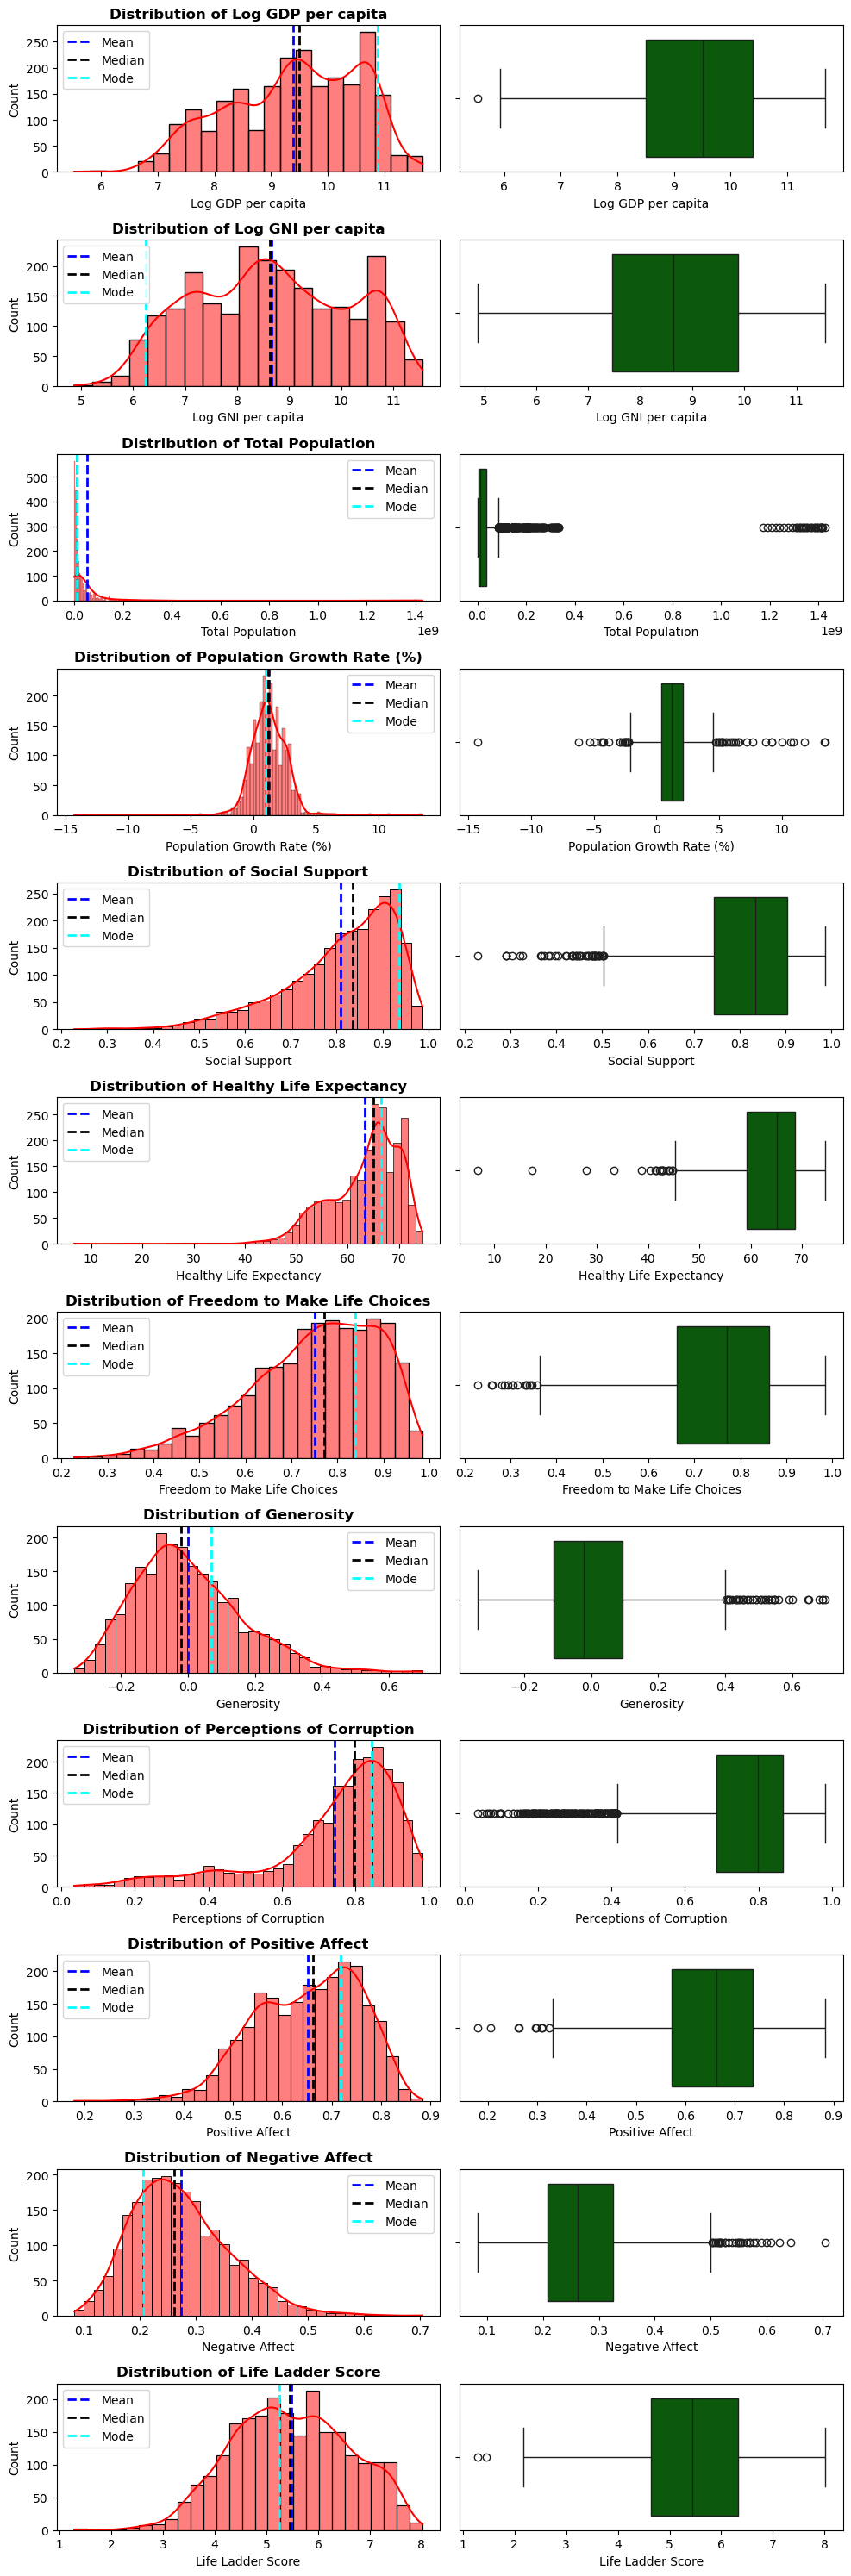

In [425]:
fig, axes = plt.subplots(12, 2, figsize=(10, 30))

for i, col in enumerate(numerical_cols):

    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0], color='red')
    axes[i, 0].axvline(x=df[col].mean(), color='blue', linewidth=2, linestyle="--", label='Mean')
    axes[i, 0].axvline(x=df[col].median(), color='black', linewidth=2, linestyle="--", label='Median')
    axes[i, 0].axvline(x=df[col].mode()[0], color='cyan', linewidth=2, linestyle="--", label='Mode')
    axes[i, 0].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i, 0].legend()

    sns.boxplot(data=df, x=col, ax=axes[i, 1], color='darkgreen')

plt.tight_layout()

#### Skewness Analysis

In [427]:
df[numerical_cols].skew()

Log GDP per capita             -0.336685
Log GNI per capita              0.000774
Total Population                7.009611
Population Growth Rate (%)      0.568588
Social Support                 -1.109298
Healthy Life Expectancy        -1.129819
Freedom to Make Life Choices   -0.699881
Generosity                      0.769381
Perceptions of Corruption      -1.485575
Positive Affect                -0.458936
Negative Affect                 0.698077
Life Ladder Score              -0.053811
dtype: float64

- Outliers and high skewness have been identified in the distribution of numerical columns. Despite this, it has been decided to keep them in the analysis as they may indicate the existence of extraordinary situations in the country.

#### Relationships Between Numerical Features

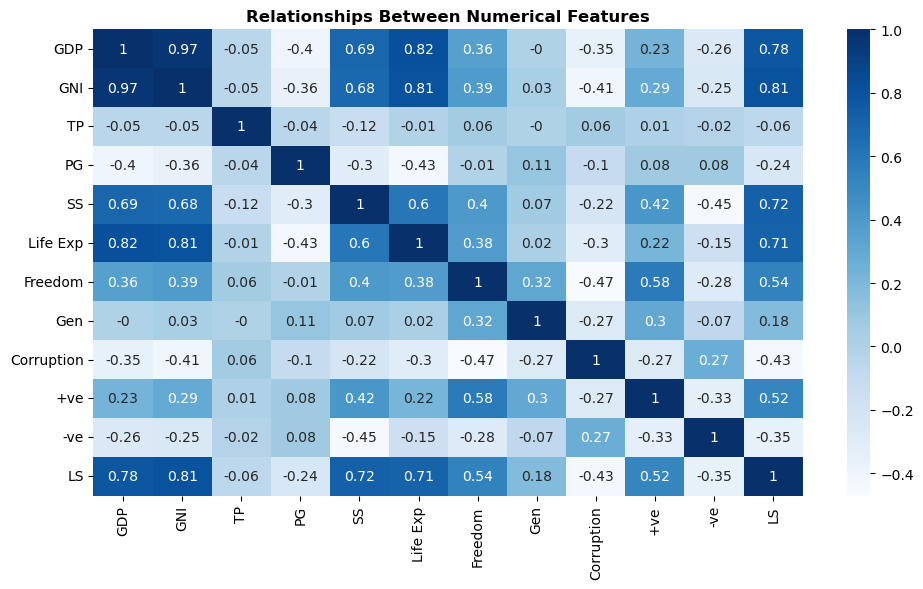

In [430]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr().round(2), cmap='Blues', annot=True,
     xticklabels=['GDP', 'GNI', 'TP', 'PG', 'SS', 'Life Exp', 'Freedom', 'Gen', 'Corruption', '+ve', '-ve', 'LS'],
     yticklabels=['GDP', 'GNI', 'TP', 'PG', 'SS', 'Life Exp', 'Freedom', 'Gen', 'Corruption', '+ve', '-ve', 'LS'])
plt.title('Relationships Between Numerical Features', fontweight='bold')
plt.tight_layout()

- The heatmap shows,
    - Healthy positive correlation between `GNI` and `GDP`, `Ladder Score` and `GDP`, `Life Expectancy` and `GDP`, `Life Expectancy` and `GNI`, `Ladder Score` and `GDP`, `Social Support` and `Ladder Score`, `Life Expectancy` and `Ladder Score`.
    - Mild positive correaltion between `GDP` and `Social Support`, `Social Support` and `GNI`, `Freedom to Make Choice` and `Postive Impact`. `Positve Impact` and `Ladder Score`.